# Running UQ guided virtual screening

In [2]:
import numpy as np
from tdc import Oracle

In [3]:
def get_oracle(prop_name):
  oracle = Oracle(name = prop_name)
  return oracle

def get_hit_rate(prop_name, AS_dim_list, num_models_list):
  oracle = get_oracle(prop_name)

  thr_list = np.arange(101)
  top_k = 50 # 55 in total
  hit_rate = np.zeros((len(AS_dim_list),len(num_models_list),5, len(thr_list)+2))
  num_hits = np.zeros((len(AS_dim_list),len(num_models_list),5, len(thr_list)+2))
  for idx_AS, AS_dim in enumerate(AS_dim_list):
    for idx_num_models, num_models in enumerate(num_models_list):
      for trial in range(5):
        data = np.load(f'./log/{prop_name.lower()}/basic/AS/{prop_name}_screening_trial_{trial}_AS_dim_{AS_dim}_num_models_{num_models}.npz')
        sorted_idx = np.argsort(-data['PTM_pred'].reshape(-1))
        true_labels = 1.0*(np.array(oracle(data['cands_list'].tolist()))>=0.5)
        # top_k = int(sum(true_labels))
        hit_rate[idx_AS,idx_num_models,trial,0]= true_labels[sorted_idx[:top_k]].mean()
        num_hits[idx_AS,idx_num_models,trial,0]= true_labels[sorted_idx[:top_k]].sum()
        for thr in thr_list:
          sorted_idx = np.argsort(-data['BMA_preds'].reshape(-1))
          hit_rate[idx_AS,idx_num_models, trial,1]= true_labels[sorted_idx[:top_k]].mean()
          num_hits[idx_AS,idx_num_models, trial,1]= true_labels[sorted_idx[:top_k]].sum()
          unc_thr = np.percentile(data['BMA_unc'][sorted_idx[:top_k]], thr)

          screened_idx = data['BMA_unc'][sorted_idx[:top_k]] <= unc_thr
          hit_rate[idx_AS,idx_num_models, trial,thr+2]= true_labels[sorted_idx[:top_k]][screened_idx].mean()
          num_hits[idx_AS,idx_num_models, trial,thr+2]= true_labels[sorted_idx[:top_k]][screened_idx].sum()

  return hit_rate

In [4]:
AS_dim_list = [5, 10, 15, 20]
num_models_list = [10, 20, 30]
thr_list = np.arange(101)
prop_name = 'DRD2'
hit_rate = get_hit_rate('DRD2', AS_dim_list, num_models_list)
hit_rate_std = hit_rate.std(axis=2)[:,:,2:]

Found local copy...


In [5]:
import matplotlib.pyplot as plt

def plot_results_view1(hit_rate, AS_dim_list, num_models_list, thr_list, prop_name):

  fig, axes = plt.subplots(2, 2, figsize=(12, 8), dpi = 300)

  # Assuming hit_rate_std has shape (len(AS_dim_list), len(num_models_list), len(thr_list))
  for i in range(len(AS_dim_list)):
      for j in range(len(num_models_list)):
          row = i // 2
          col = i % 2
          ax = axes[row, col]

          ax.plot(100-thr_list,hit_rate_std[i, j], label=f"num_models={num_models_list[j]}")

          ax.set_title(f"AS dim={AS_dim_list[i]}")
          ax.set_xlabel("Screening Threshold")
          ax.set_ylabel("Hit Rate Standard Deviation")
          ax.legend(loc = 'upper left')
          ax.set_ylim(-0.005, hit_rate_std.max()*1.05)

  plt.suptitle(f"Screening for {prop_name}")
  plt.tight_layout()
  plt.show()

def plot_results_view2(hit_rate, AS_dim_list, num_models_list, thr_list, prop_name):

  fig, axes = plt.subplots(3, 1, figsize=(12, 12), dpi=300)

  # Assuming hit_rate_std has shape (len(AS_dim_list), len(num_models_list), len(thr_list))
  for j in range(len(num_models_list)):
    for i in range(len(AS_dim_list)):
      row = j
      ax = axes[row]

      ax.plot(100 - thr_list, hit_rate_std[i, j], label=f"AS dim={AS_dim_list[i]}")

      ax.set_title(f"num_models={num_models_list[j]}")
      ax.set_xlabel("Screening Threshold")
      ax.set_ylabel("Hit Rate Standard Deviation")
      ax.legend(loc='upper left')
      ax.set_ylim(-0.005, hit_rate_std.max() * 1.05)

  plt.suptitle(f"Screening for {prop_name}")
  plt.tight_layout()
  plt.show()



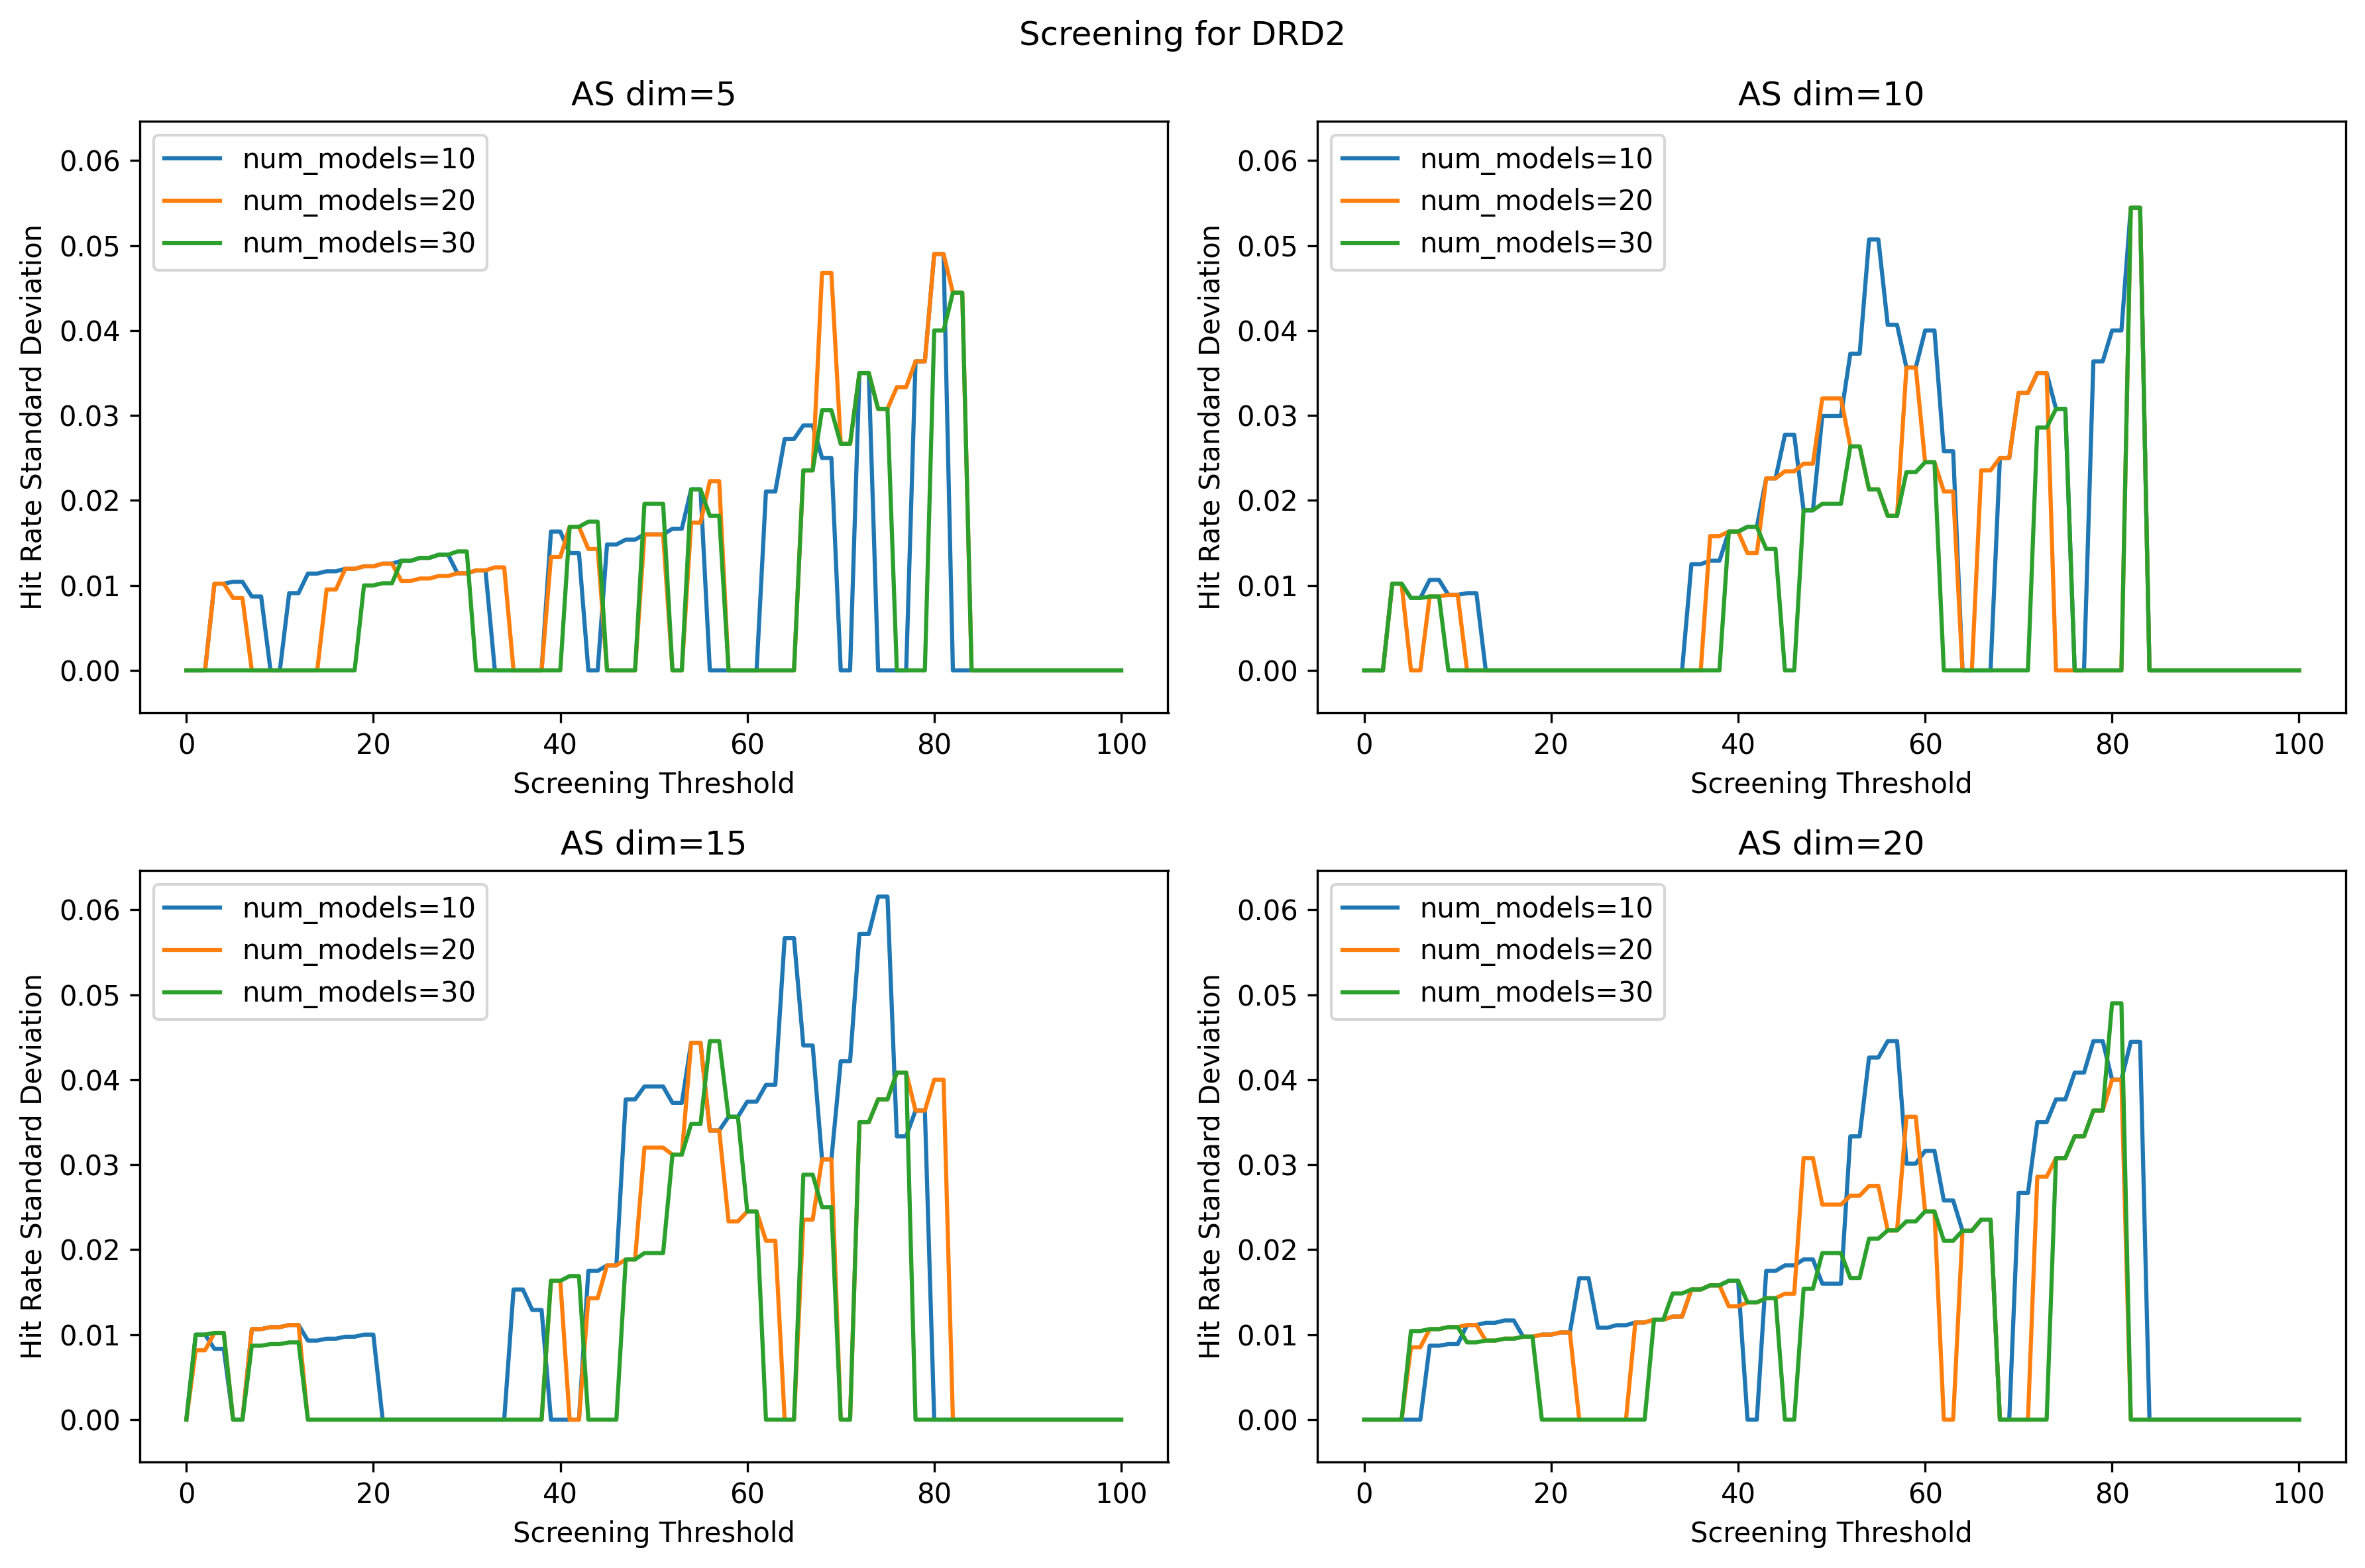

In [6]:
plot_results_view1(hit_rate_std, AS_dim_list, num_models_list, thr_list, prop_name)

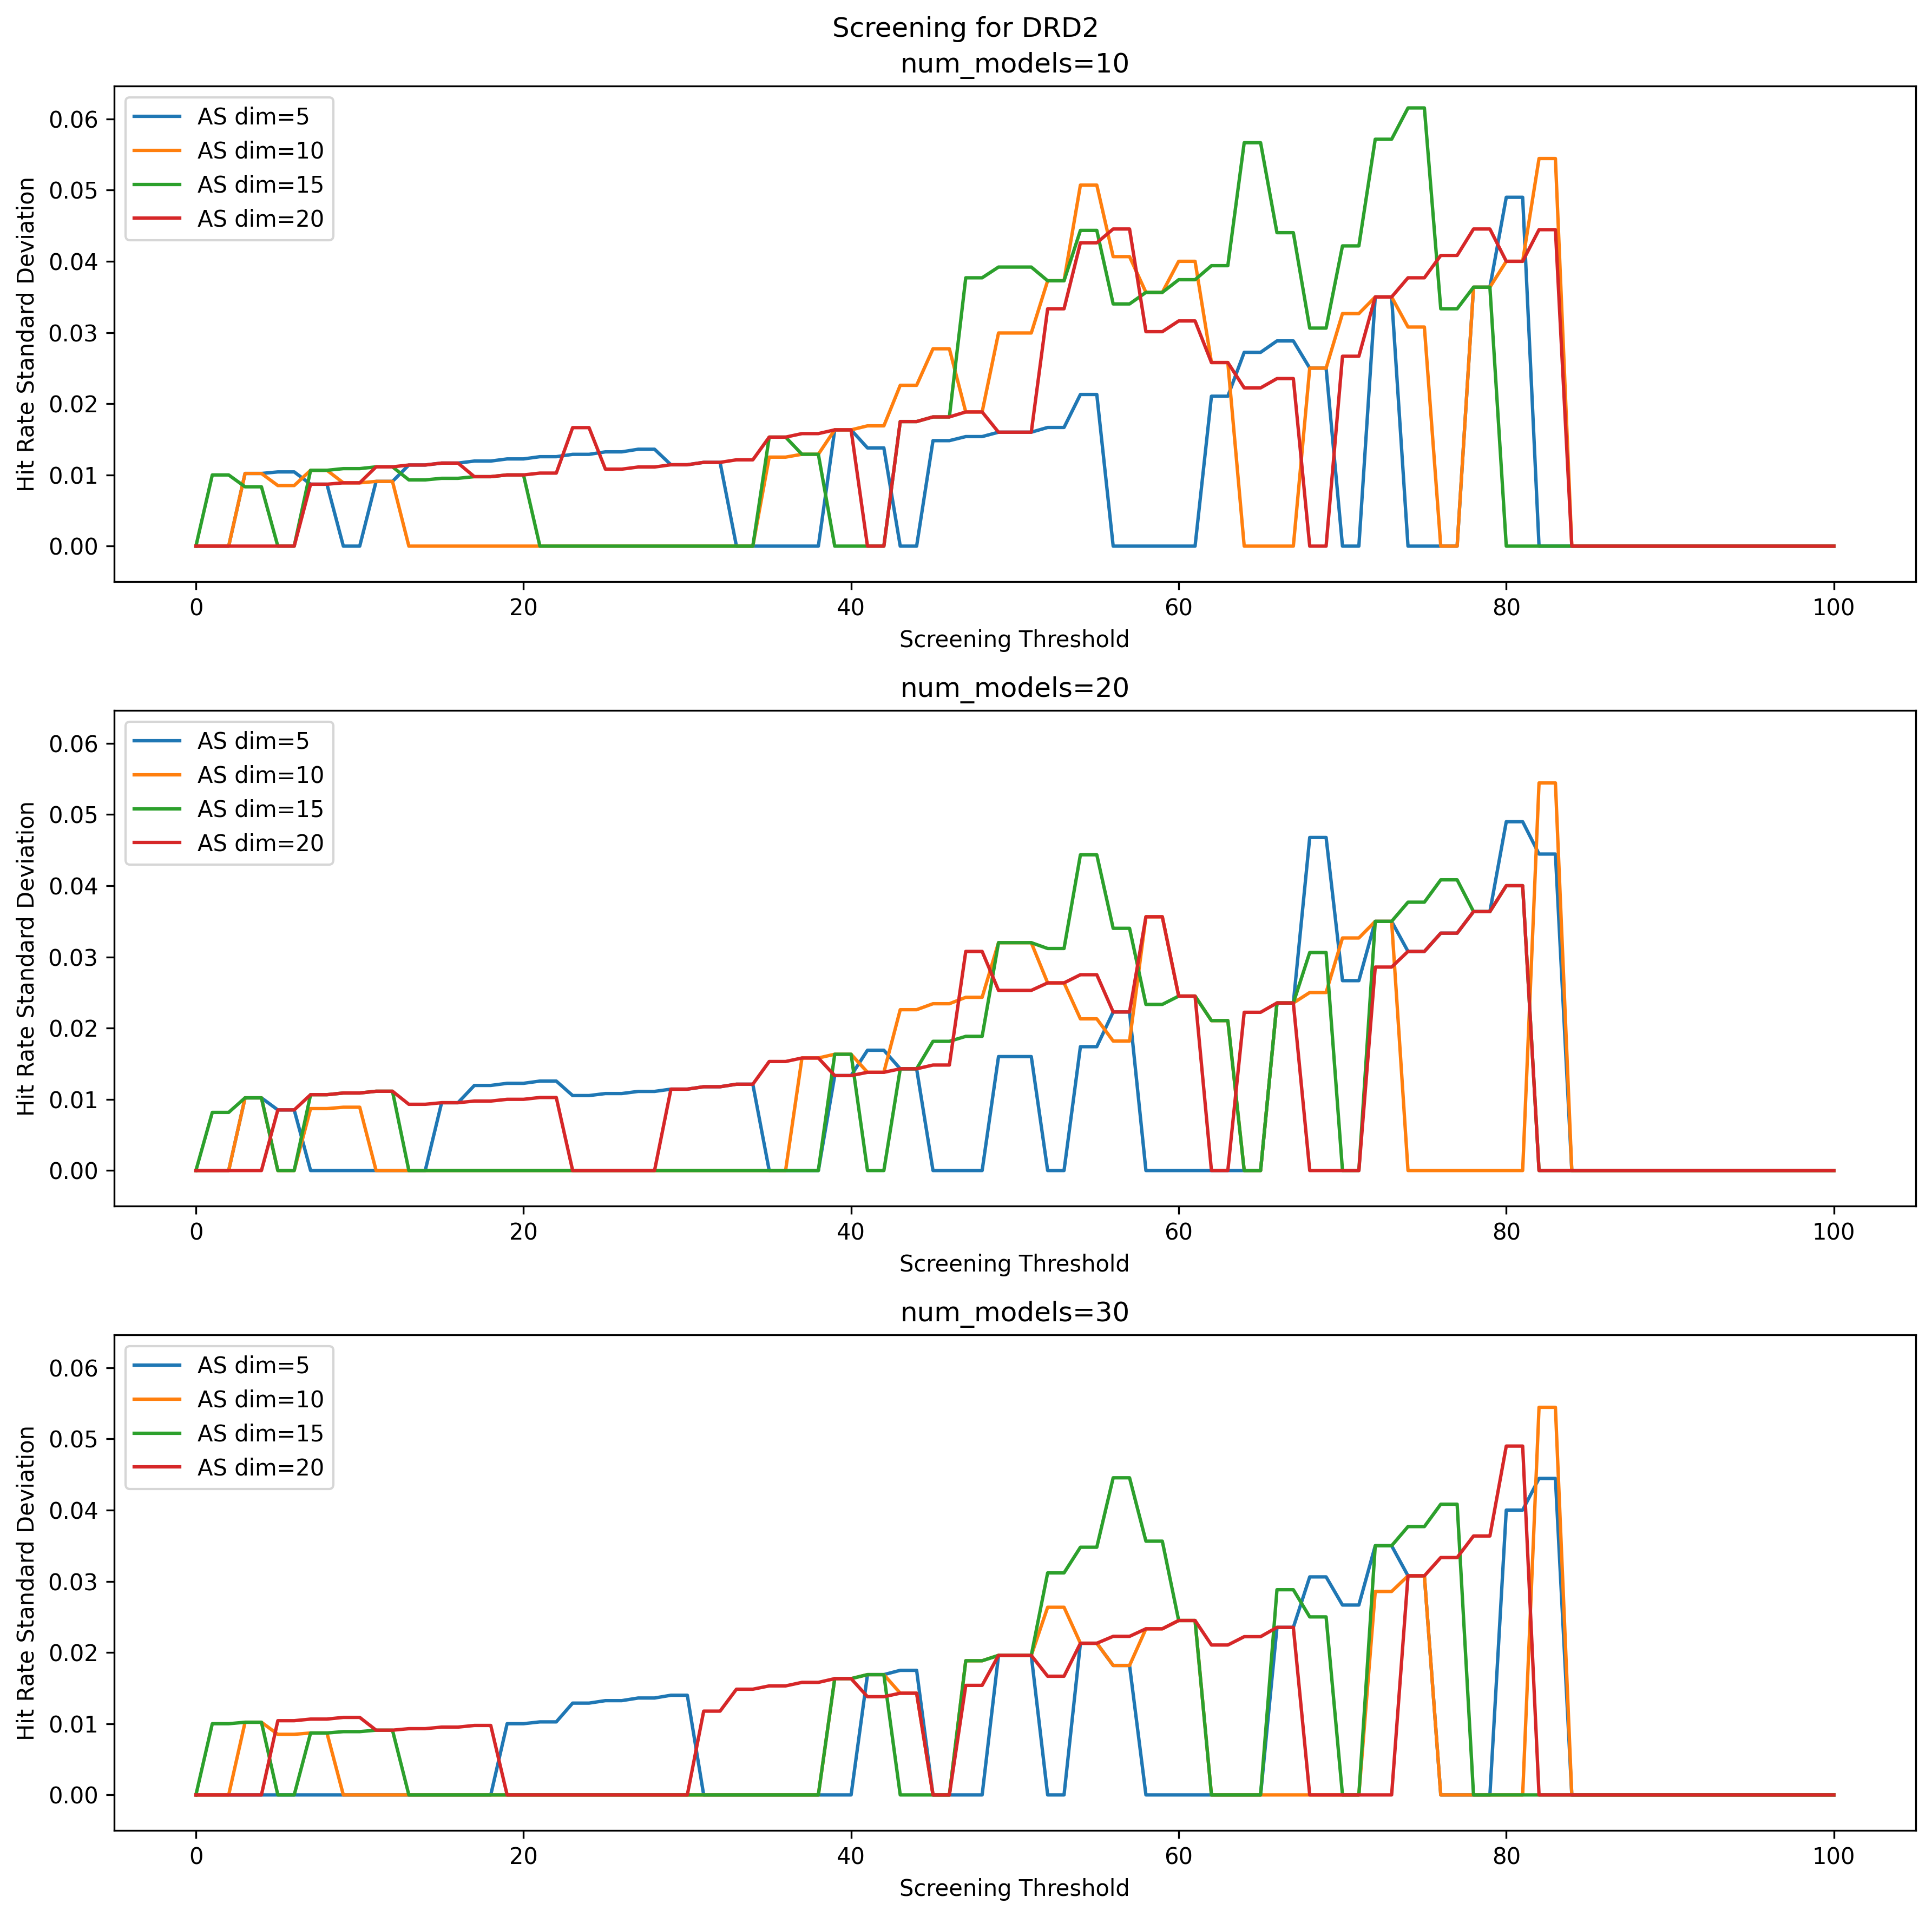

In [7]:
plot_results_view2(hit_rate_std, AS_dim_list, num_models_list, thr_list, prop_name)

## For GSK3$\beta$

In [8]:
AS_dim_list = [5, 10, 15, 20]
num_models_list = [10, 20, 30]
thr_list = np.arange(101)
prop_name = 'GSK3B'
hit_rate = get_hit_rate(prop_name, AS_dim_list, num_models_list)
hit_rate_std = hit_rate.std(axis=2)[:,:,2:]

Found local copy...


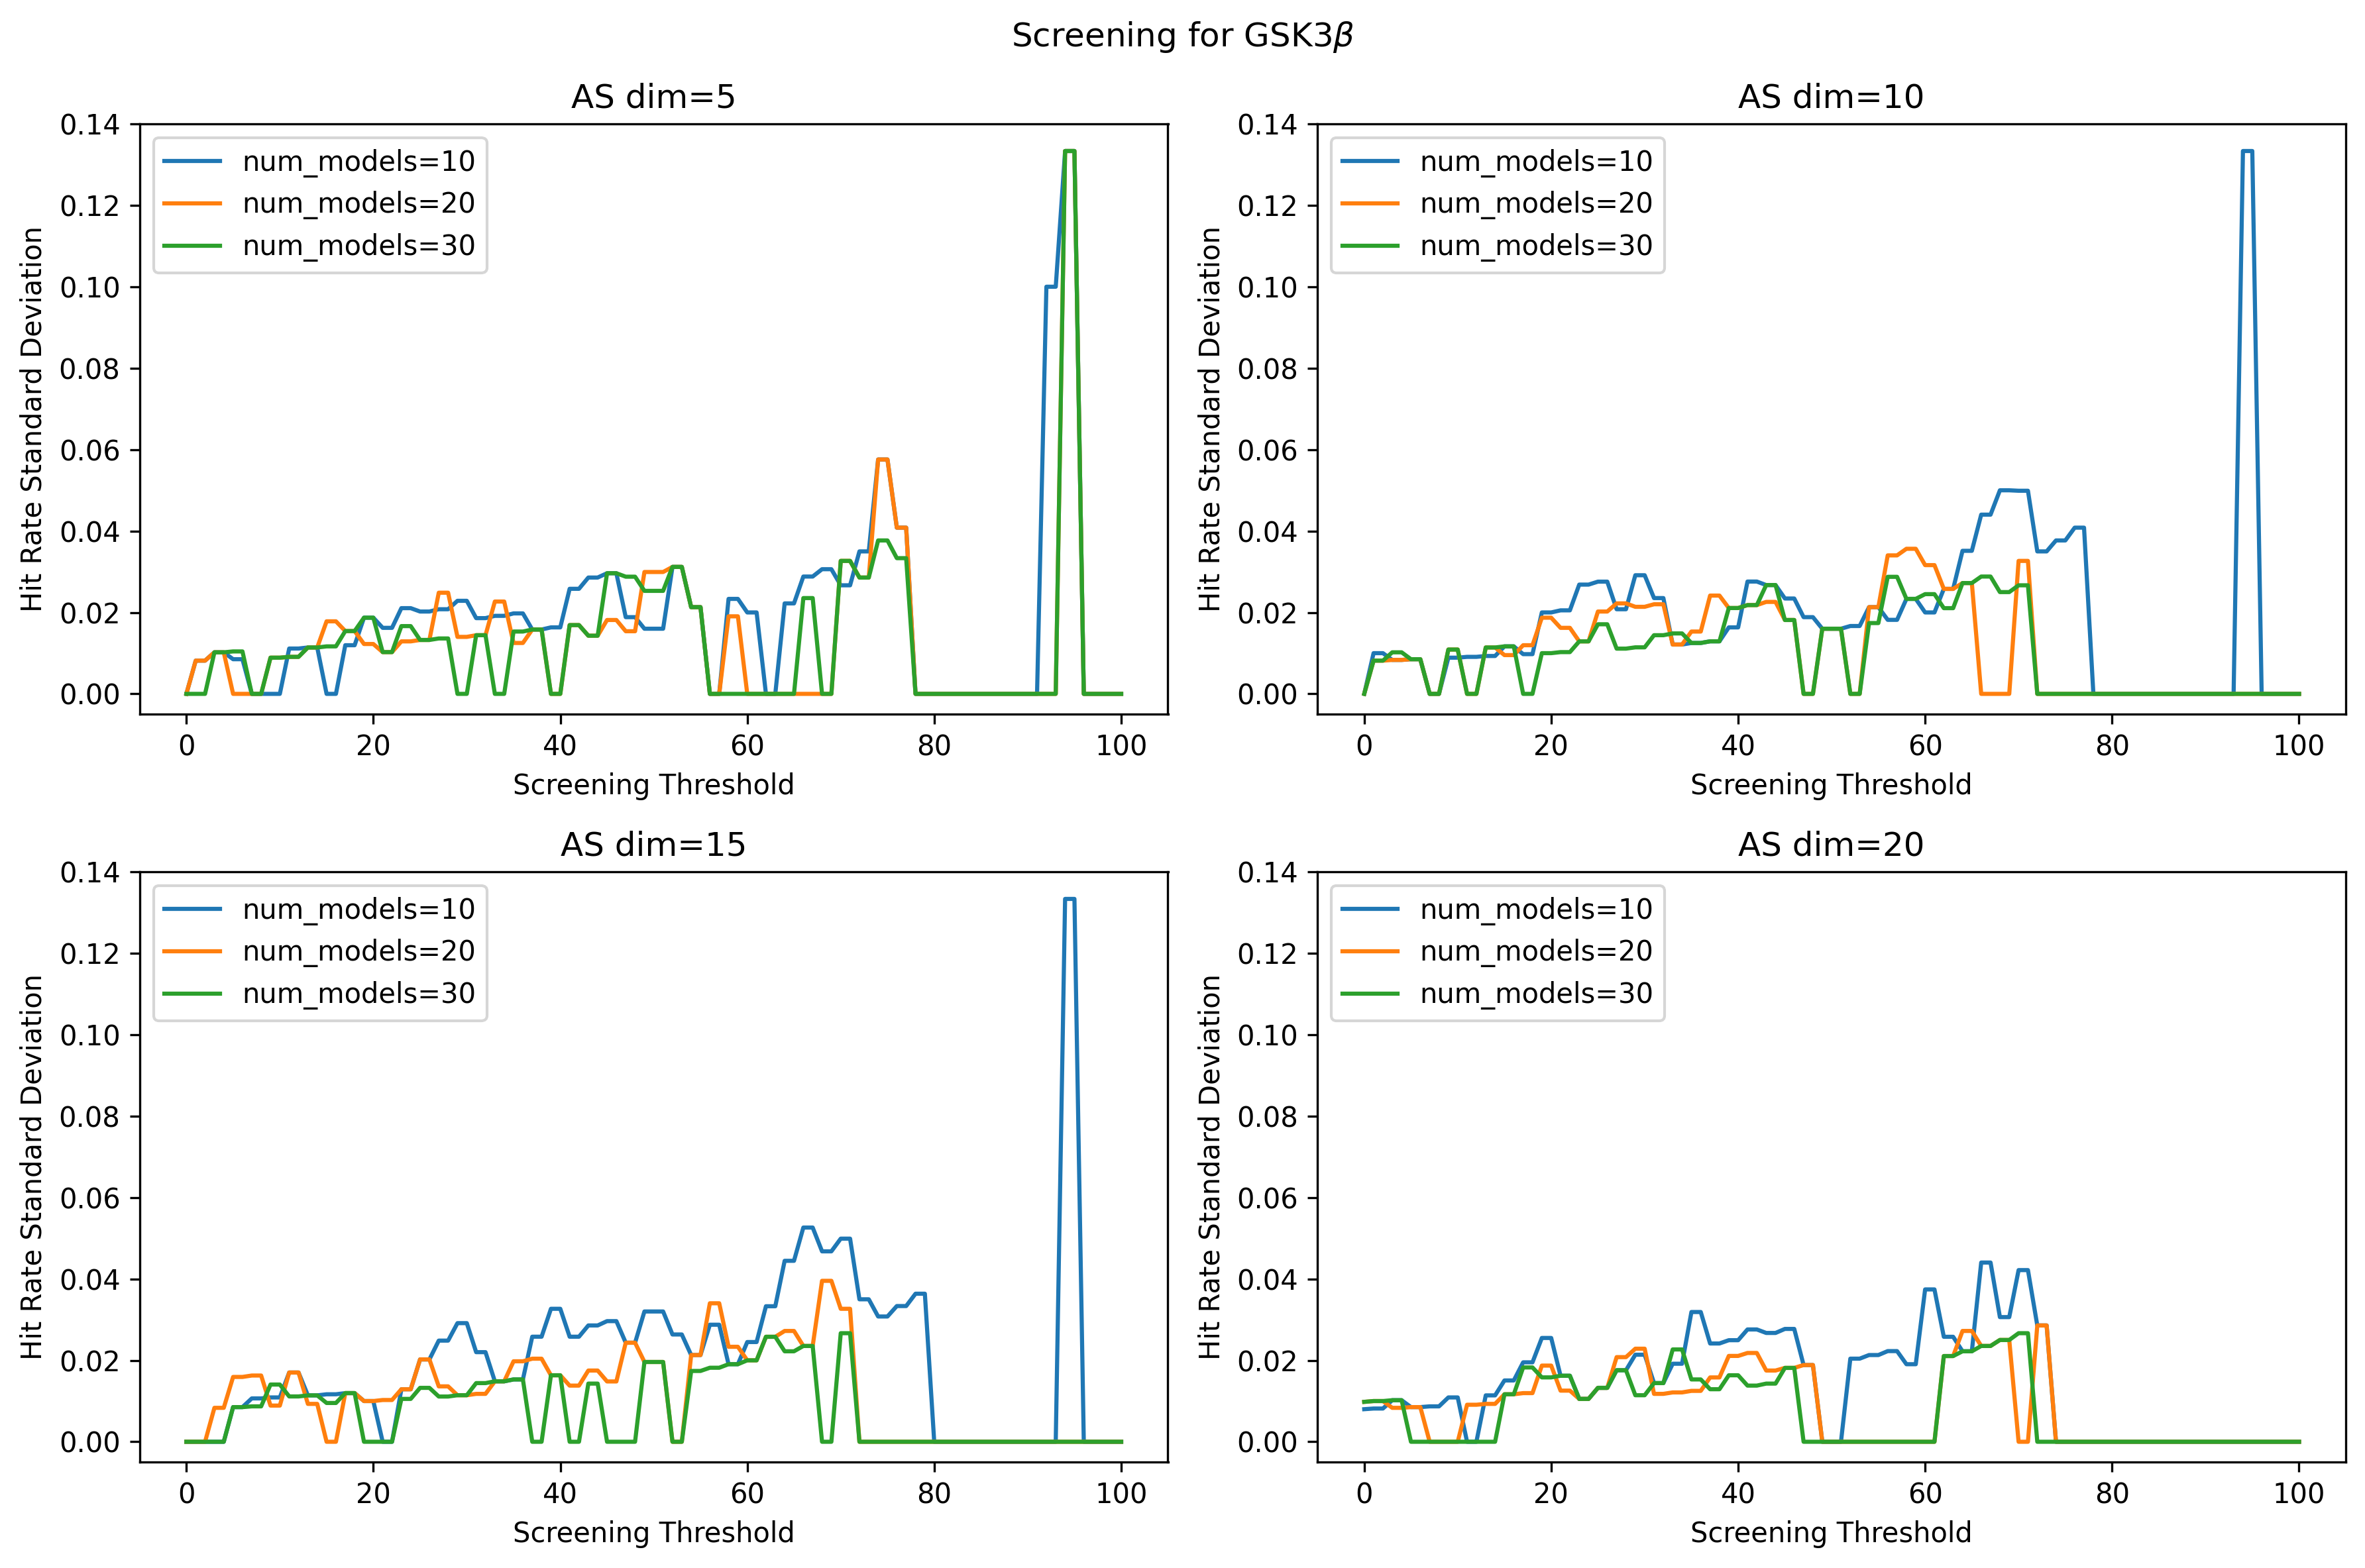

In [11]:
plot_results_view1(hit_rate_std, AS_dim_list, num_models_list, thr_list, r'GSK3$\beta$')

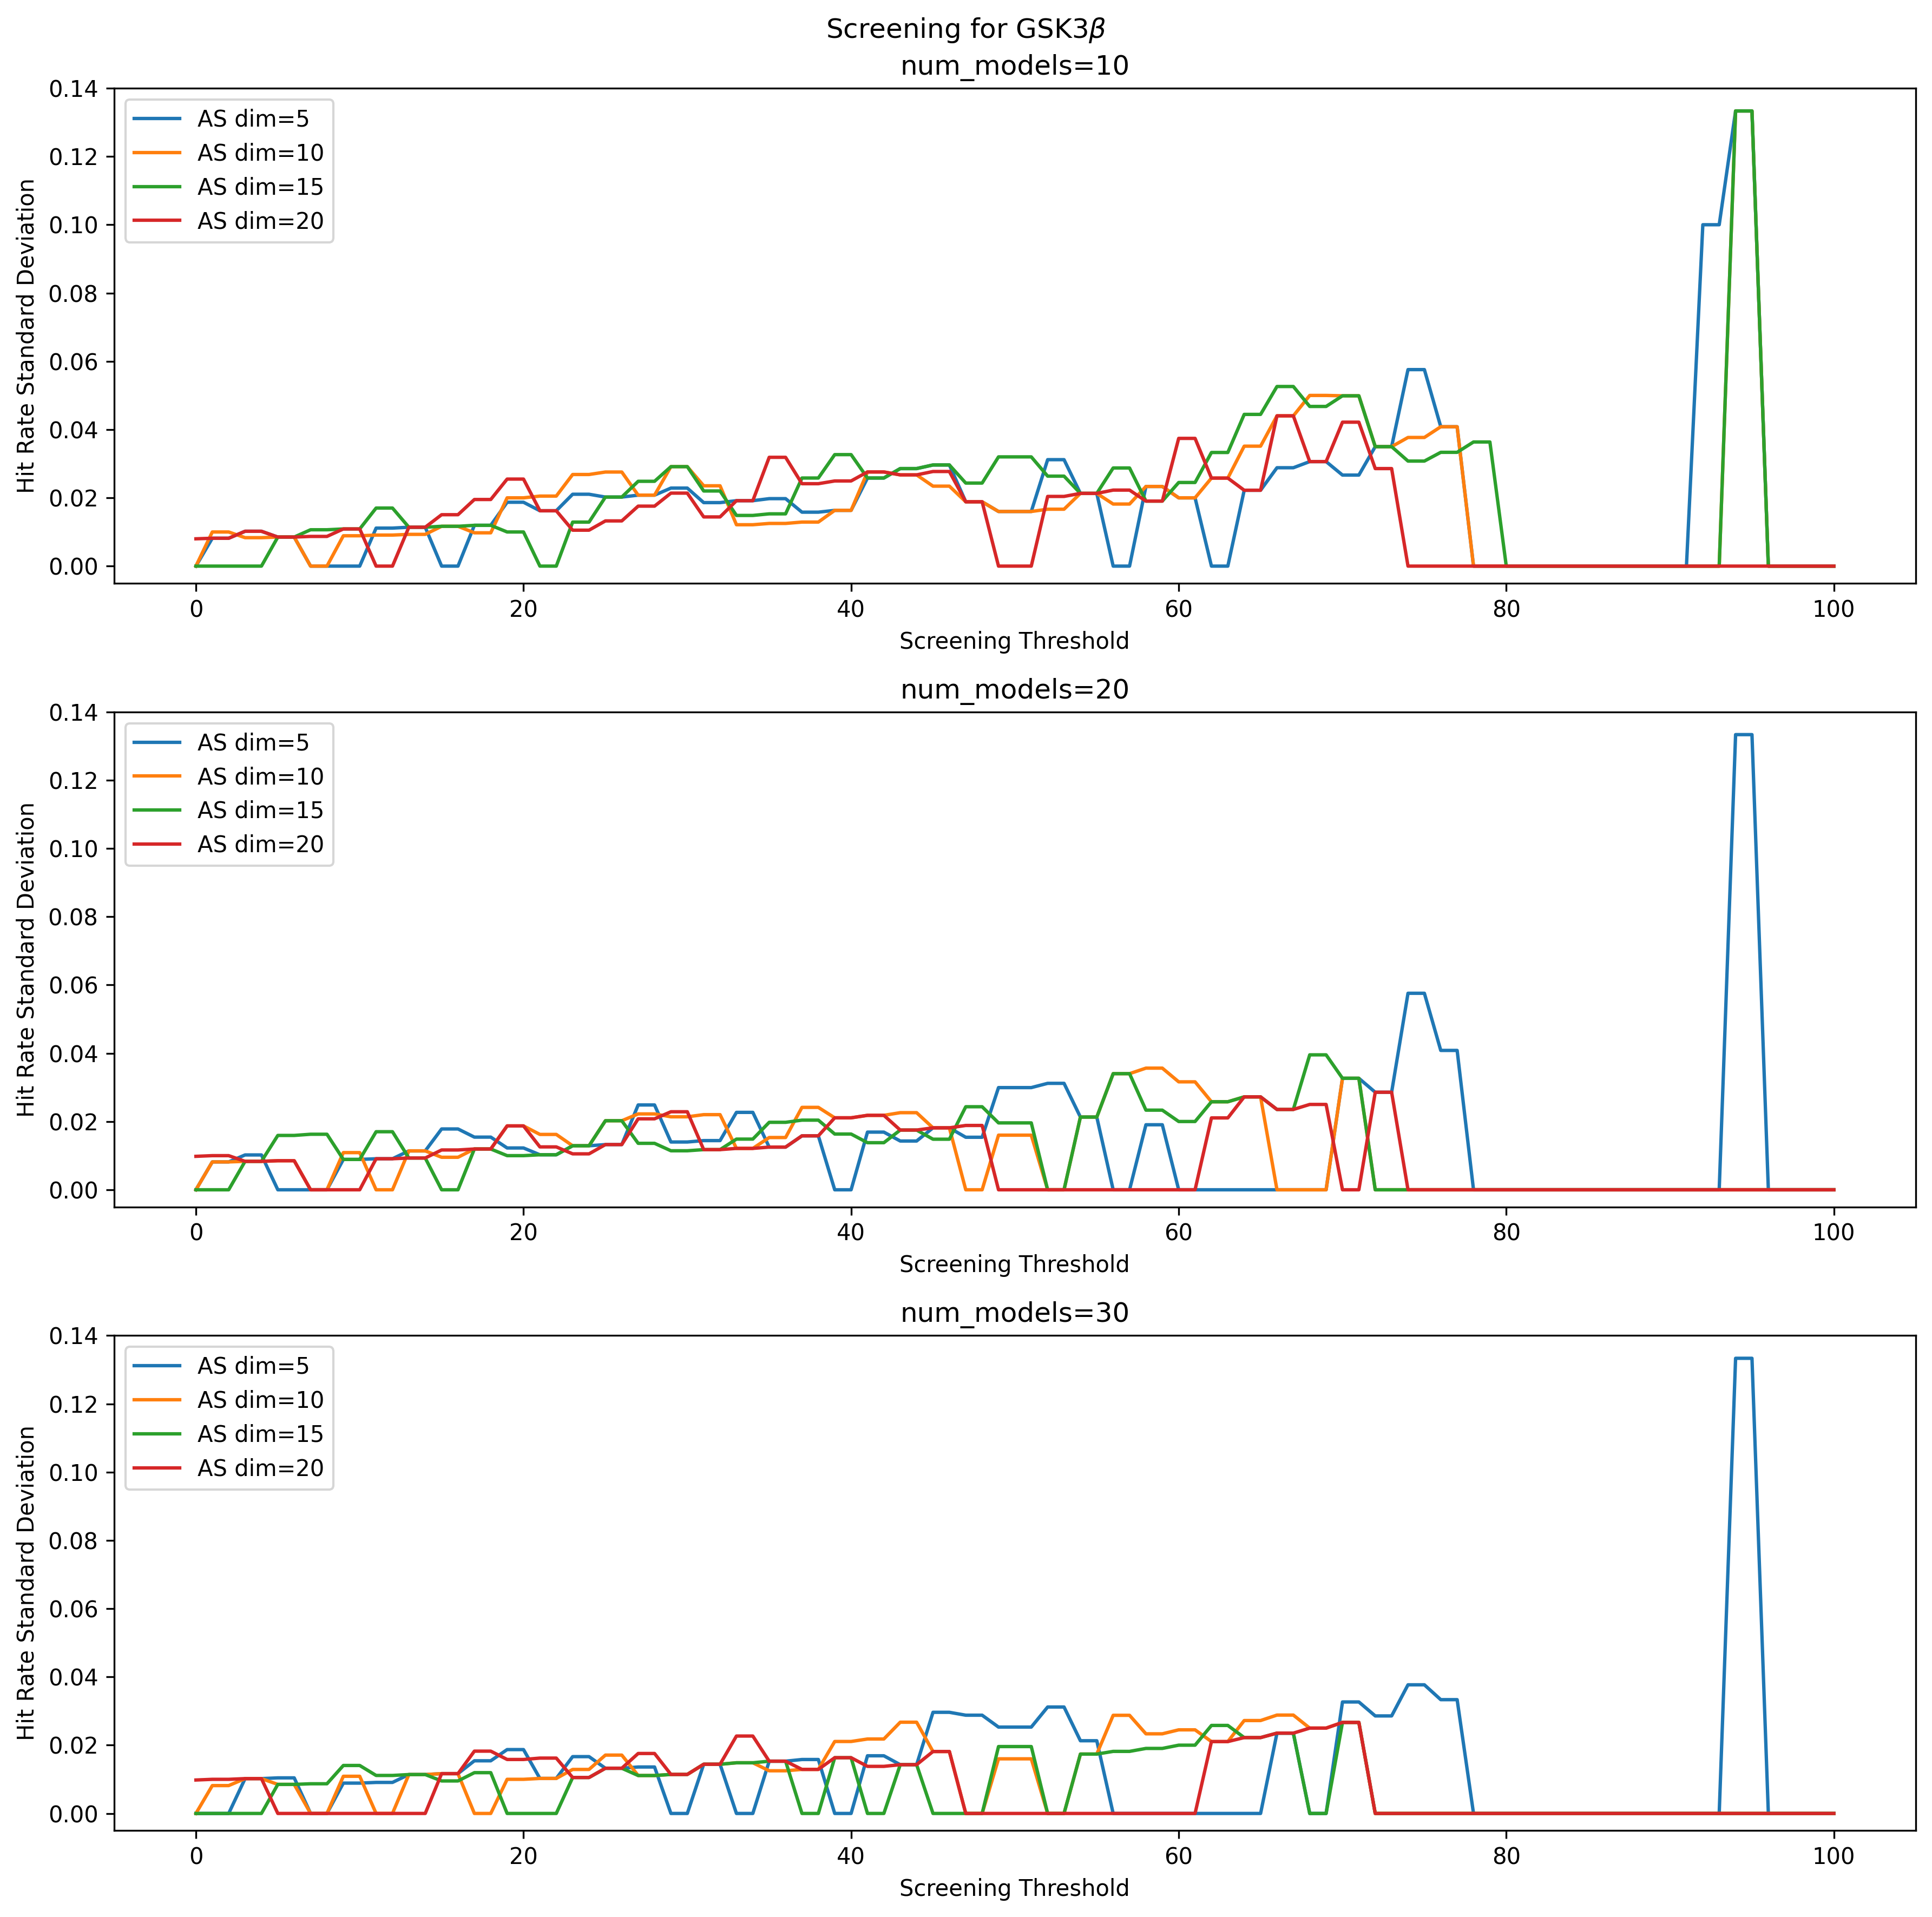

In [12]:
plot_results_view2(hit_rate_std, AS_dim_list, num_models_list, thr_list,  r'GSK3$\beta$')